In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 10
%matplotlib inline

In [28]:
plt.rcParams['font.sans-serif']='SimHei' #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法显示的问题
%config InlineBackend.figure_format = 'svg' #将图表设置为svg格式以保证更为清晰的显示

In [26]:
years = range(1880,2001)
pieces = []
columns = ['name','sex','births']

In [10]:
for year in years:
    path = r'C:\Users\Nikola\Documents\我的数据源\10 利用Python进行数据分析 第二版\datasets\babynames\yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)

In [11]:
names = pd.concat(pieces, ignore_index = True)

In [12]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1361925,Zeph,M,5,2000
1361926,Zeven,M,5,2000
1361927,Ziggy,M,5,2000
1361928,Zo,M,5,2000


In [14]:
total_births = names.pivot_table('births', index = 'year', columns ='sex', aggfunc='sum')
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
1996,1751681,1892700
1997,1739331,1883571
1998,1765390,1909676


Text(0, 0.5, '出生人数')

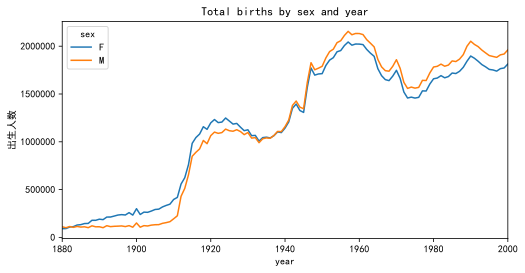

In [30]:
total_births.plot(title='Total births by sex and year',figsize=(8,4))
plt.ylabel("出生人数")

In [31]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group

In [33]:
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1361925,Zeph,M,5,2000,0.000003
1361926,Zeven,M,5,2000,0.000003
1361927,Ziggy,M,5,2000,0.000003
1361928,Zo,M,5,2000,0.000003


In [34]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
1998  M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
Name: prop, Length: 242, dtype: float64

In [36]:
def get_top(group, n=1000):
    return group.sort_values(by='births', ascending = False)[:n]

In [40]:
top_n = names.groupby(['year','sex']).apply(get_top)
top_n.reset_index(inplace= True, drop=True)

In [41]:
top_n

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [44]:
boys = top_n[top_n.sex == 'M']
girls = top_n[top_n.sex == 'F']

In [45]:
total_births = top_n.pivot_table('births', index='year', columns='name',aggfunc='sum')
total_births

name,Aaliyah,Aaron,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,102.0,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,...,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0
1881,NaN,94.0,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,...,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0
1882,NaN,85.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,...,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0
1883,NaN,105.0,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0
1884,NaN,97.0,NaN,NaN,NaN,NaN,98.0,NaN,NaN,6.0,...,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0
1885,NaN,88.0,6.0,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0
1886,NaN,86.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,7.0,...,NaN,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0
1887,NaN,78.0,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,...,11.0,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0
1888,NaN,90.0,NaN,NaN,NaN,NaN,137.0,NaN,6.0,9.0,...,NaN,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0


In [46]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 1880 to 2000
Columns: 6413 entries, Aaliyah to Zula
dtypes: float64(6413)
memory usage: 5.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002139C159DA0>,
      dtype=object)

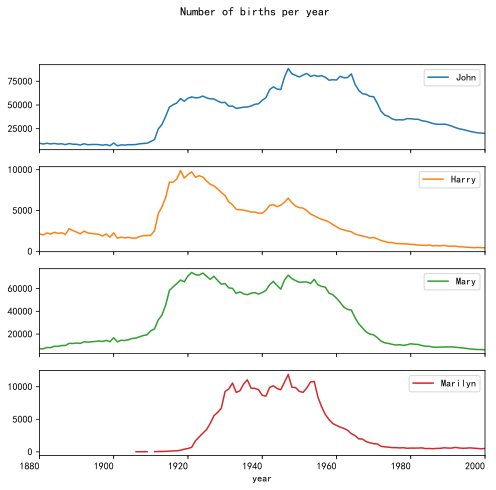

In [50]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(8,8),grid=False, title='Number of births per year',rot=0)

In [52]:
table = top_n.pivot_table(values='prop', index = 'year', columns='sex', aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


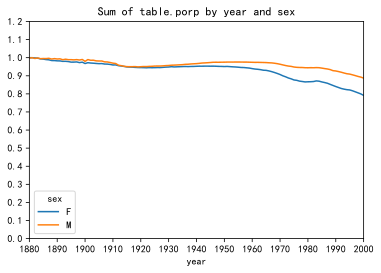

In [54]:
table.plot(title='Sum of table.porp by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2010,10))

In [58]:
df = boys[boys.year == 2000]
df

,name,sex,births,year,prop
240877,Jacob,M,34454,2000,0.017563
240878,Michael,M,32016,2000,0.016321
240879,Matthew,M,28563,2000,0.014560
240880,Joshua,M,27522,2000,0.014030
240881,Christopher,M,24916,2000,0.012701
...,...,...,...,...,...
241872,Vincenzo,M,149,2000,0.000076
241873,Jaleel,M,148,2000,0.000075
241874,Tracy,M,148,2000,0.000075
241875,Lionel,M,148,2000,0.000075


In [63]:
prop_cumsum = df.sort_values(by='prop', ascending =False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5)

76

In [64]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending =False)
    return group.prop.cumsum().values.searchsorted(q)+1

In [67]:
diversity = top_n.groupby(['year','sex']).apply(get_quantile_count)
diversity= diversity.unstack('sex')

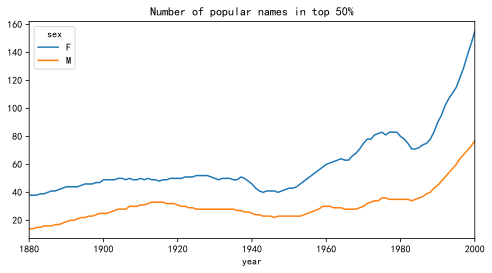

In [69]:
diversity.plot(title = 'Number of popular names in top 50%',figsize=(8,4))

In [70]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1361925,Zeph,M,5,2000,0.000003
1361926,Zeven,M,5,2000,0.000003
1361927,Ziggy,M,5,2000,0.000003
1361928,Zo,M,5,2000,0.000003


In [73]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1361925    h
1361926    n
1361927    y
1361928    o
1361929    r
Name: last_letter, Length: 1361930, dtype: object

In [78]:
table = names.pivot_table('births',index=last_letters, columns=['sex','year'],aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      1991      1992      1993   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   50977.0   47271.0   45592.0   
b                NaN      NaN      NaN  ...   32179.0   32837.0   35817.0   
c                NaN      NaN      NaN  ...   28259.0   27252.0   26423.0   
d             1027.0   1298.0   1374.0  ...   93858.0   87586.0   82541.0   
e            54353.0  66750.0  66663.0  ...  146218.0  149738.0  147895.0   
...              ...      ...      ...  ...       ...       ...       ...   
v                NaN      NaN      NaN  ...     427.0     421.0     379.0   
w                NaN      NaN      NaN  ...   77233.0   72136.0   66886.0   
x                NaN      NaN      NaN  ...    9547.0   10461.0   10647.0   
y            14980.0  17931.0  17601.0  ...  208747.0  202719.0  197129.0   
z              188.0    238.0    277.0  ...    2726.0    2621.0    2774.0   

sex                                                                      \
year             1994      1995      1996      1997      1998      1999   
last_letter                                                               
a             44441.0   44991.0   42739.0   41458.0   41281.0   40608.0   
b             38226.0   40717.0   42791.0   46177.0   50330.0   50051.0   
c             26912.0   26330.0   26270.0   25848.0   26624.0   26160.0   
d             77163.0   72313.0   70157.0   69036.0   67683.0   65507.0   
e            145682.0  140838.0  142438.0  141857.0  144854.0  145047.0   
...               ...       ...       ...       ...       ...       ...   
v               457.0     499.0     521.0     598.0     738.0     869.0   
w             63385.0   62731.0   61164.0   60402.0   58254.0   57981.0   
x             10047.0   10238.0    9619.0    9970.0   10547.0   10643.0   
y            187197.0  174460.0  165817.0  157831.0  150895.0  146142.0   
z              2632.0    2631.0    2632.0    2624.0    2787.0    2871.0   

sex                    
year             2000  
last_letter            
a             40837.0  
b             50892.0  
c             26998.0  
d             64251.0  
e            148821.0  
...               ...  
v               983.0  
w             55746.0  
x             10683.0  
y            143205.0  
z              2947.0  

[26 rows x 242 columns]

In [80]:
subtable = table.reindex(columns=[1910,1960,2000],level='year')
subtable

sex                 F                            M                    
year             1910      1960      2000     1910      1960      2000
last_letter                                                           
a            108376.0  691247.0  675485.0    977.0    5204.0   40837.0
b                 NaN     694.0     372.0    411.0    3912.0   50892.0
c                 5.0      49.0     525.0    482.0   15476.0   26998.0
d              6750.0    3729.0    4380.0  22111.0  262112.0   64251.0
e            133569.0  435013.0  318199.0  28655.0  178823.0  148821.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0      42.0     22.0      78.0     983.0
w                 8.0      63.0     849.0   1229.0   16444.0   55746.0
x                 6.0      74.0     736.0    770.0    3947.0   10683.0
y             43991.0  308504.0  246190.0  15021.0  343318.0  143205.0
z               967.0    1333.0    1533.0     33.0     392.0    2947.0

[26 rows x 6 columns]

In [81]:
subtable.sum(axis=0)

sex  year
F    1910     396416.0
     1960    2022062.0
     2000    1813960.0
M    1910     194198.0
     1960    2132588.0
     2000    1961702.0
dtype: float64

In [82]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2000      1910      1960      2000
last_letter                                                            
a            0.273390  0.341853  0.372381  0.005031  0.002440  0.020817
b                 NaN  0.000343  0.000205  0.002116  0.001834  0.025943
c            0.000013  0.000024  0.000289  0.002482  0.007257  0.013763
d            0.017028  0.001844  0.002415  0.113858  0.122908  0.032753
e            0.336941  0.215133  0.175417  0.147556  0.083853  0.075863
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000023  0.000113  0.000037  0.000501
w            0.000020  0.000031  0.000468  0.006329  0.007711  0.028417
x            0.000015  0.000037  0.000406  0.003965  0.001851  0.005446
y            0.110972  0.152569  0.135720  0.077349  0.160987  0.073000
z            0.002439  0.000659  0.000845  0.000170  0.000184  0.001502

[26 rows x 6 columns]

In [83]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1361925,Zeph,M,5,2000,0.000003
1361926,Zeven,M,5,2000,0.000003
1361927,Ziggy,M,5,2000,0.000003
1361928,Zo,M,5,2000,0.000003


In [100]:
names[names.name=='Nikola'].sex.value_counts()

M    38
F    36
Name: sex, dtype: int64

In [92]:
a

Jessie         242
Johnnie        242
Jesse          242
Ollie          242
Tommie         242
              ... 
Jacobrobert      1
Mckynlee         1
Tammila          1
Nikolaas         1
Syon             1
Name: name, Length: 70565, dtype: int64